# Decision Tree?

- A Decision Tree is a supervised machine learning algorithm used for classification and regression tasks. It mimics human decision-making by asking a sequence of if-else questions.

#### Elements of a Decision Tree

**1. Root Node**
- This is the topmost node of the tree. 
- It represents the entire dataset and initiates the first split based on the best feature.

**2. Decision Nodes (Internal Nodes)**
- These are intermediate nodes where the data is split based on a feature.
- They represent the questions or conditions.

**3. Leaf Nodes (Terminal Nodes)**
- These are the final outputs of the decision tree.
- They do not split further and contain the predicted class (classification) or value (regression).

**4. Branches**
- These are the edges or lines connecting nodes.
- They represent the outcome of a condition at a node.

**5. Paths**
- A path is the sequence of nodes and branches from the root to a leaf.
- Each path defines a rule that maps input features to a prediction.

#### Terminologies in Decision Trees

**1. Splitting**
- The process of dividing a node into two or more sub-nodes.
- Done based on a criterion (e.g., Gini, Entropy).

**Example:**
- If "Age" gives the best separation of the classes, the node is split on "Age".

**2. Impurity**
- Measures how mixed the classes are in a node.
- We want to split the data so that impurity is minimized in the child nodes.

**Common impurity measures:**
- Gini Impurity
- Entropy
- Variance (for regression)

**Example (Gini):**
- If a node has 50% Yes and 50% No: 𝐺𝑖𝑛𝑖 = 1 − ( 0.5^2 + 0.5^2 ) = 0.5 → high impurity

**3. Information Gain**
- The reduction in impurity after a split.
- Used in ID3 and C4.5 trees. Info Gain = Entropy (parent) − Weighted avg. Entropy (children)

**Example:**
- Entropy before = 0.9, after splitting = 0.4 → Info Gain = 0.5

**4. Pruning**
- Removing parts of the tree to avoid overfitting.
- Done after full growth (post-pruning) or during growth (pre-pruning).

**Example:**
- If a branch leads to 1% accuracy gain but adds 10 nodes, it may be pruned.

**5. Depth of the Tree**
- The longest path from root to any leaf node.
- Deeper trees → complex models (more prone to overfitting)

**Example:**
- If a tree has 3 decision levels before prediction, its depth is 3.

**6. Overfitting**
- When the tree memorizes training data (too deep, too many nodes)
- Poor generalization to new data

**Solution:** Pruning, limiting max depth, min samples per node.

**7. Entropy**
- A measure of uncertainty in the data:
- 𝐸𝑛𝑡𝑟𝑜𝑝𝑦 = − ∑ 𝑝𝑖 log⁡2 (𝑝𝑖)

**Example:**
- All examples are the same class → Entropy = 0
- Equal split (50/50) → Entropy = 1

**8. Gini Index**
- Similar to entropy, but simpler:
- Gini=1−∑pi^2

**Example:**
- 3 Yes, 2 No → 𝐺𝑖𝑛𝑖 = 1 − (0.6^2 + 0.4^2) = 0.48

In [3]:
#!pip install kagglehub

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meirnizri/covid19-dataset")

print("Path to dataset files:", path)

100%|██████████████████████████████████████████████████████████████████████████████| 4.66M/4.66M [00:11<00:00, 437kB/s]

Extracting files...


Path to dataset files: C:\Users\hp\.cache\kagglehub\datasets\meirnizri\covid19-dataset\versions\1


In [7]:
import pandas as pd
import os

# List files in the downloaded dataset path
print(os.listdir(path))  # This shows you which files are available

# Load the relevant CSV file (replace with actual filename if different)
df = pd.read_csv(os.path.join(path, "Covid Data.csv"))  # adjust filename if needed

# Preview the data
df.head()

['Covid Data.csv']


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


### Important Feature Groups

| Group              | Features                                                                 |
|-------------------|--------------------------------------------------------------------------|
|  **Demographics**     | `SEX`, `AGE`, `PREGNANT`                                                |
|  **Medical Status**   | `PATIENT_TYPE`, `DATE_DIED`, `ICU`, `INTUBED`                         |
|  **Comorbidities**    | `DIABETES`, `PNEUMONIA`, `ASTHMA`, `INMSUPR`, `HIPERTENSION`, `OTHER_DISEASE`, `CARDIOVASCULAR`, `OBESITY`, `RENAL_CHRONIC`, `TOBACCO` |
|  **Label Candidate**  | `CLASIFFICATION_FINAL`, or derived from `DATE_DIED`, `ICU`, `PATIENT_TYPE` |

In [8]:
df.shape

(1048575, 21)

#### Data Info & Missing Values

In [10]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [16]:
# Check missing values
missing = df.isnull().sum()
#missing[missing > 0]

In [17]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [23]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [24]:
for col in df.columns:
    print(f"\n Top 5 value counts for column: {col}")
    print(df[col].value_counts().head())


 Top 5 value counts for column: USMER
USMER
2    662903
1    385672
Name: count, dtype: int64

 Top 5 value counts for column: MEDICAL_UNIT
MEDICAL_UNIT
12    602995
4     314405
6      40584
9      38116
3      19175
Name: count, dtype: int64

 Top 5 value counts for column: SEX
SEX
1    525064
2    523511
Name: count, dtype: int64

 Top 5 value counts for column: PATIENT_TYPE
PATIENT_TYPE
1    848544
2    200031
Name: count, dtype: int64

 Top 5 value counts for column: DATE_DIED
DATE_DIED
9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
Name: count, dtype: int64

 Top 5 value counts for column: INTUBED
INTUBED
97    848544
2     159050
1      33656
99      7325
Name: count, dtype: int64

 Top 5 value counts for column: PNEUMONIA
PNEUMONIA
2     892534
1     140038
99     16003
Name: count, dtype: int64

 Top 5 value counts for column: AGE
AGE
30    27010
31    25927
28    25313
29    25134
34    24872
Name: count, dtype: int64

In [25]:
for i in df.columns:
    print(i,"=>\t",len(df[i].unique()))

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
DATE_DIED =>	 401
INTUBED =>	 4
PNEUMONIA =>	 3
AGE =>	 121
PREGNANT =>	 4
DIABETES =>	 3
COPD =>	 3
ASTHMA =>	 3
INMSUPR =>	 3
HIPERTENSION =>	 3
OTHER_DISEASE =>	 3
CARDIOVASCULAR =>	 3
OBESITY =>	 3
RENAL_CHRONIC =>	 3
TOBACCO =>	 3
CLASIFFICATION_FINAL =>	 7
ICU =>	 4


In [27]:
print(df['DATE_DIED'].value_counts().head())

# Create a new binary label: 1 = died, 0 = did not die
df['DIED'] = df['DATE_DIED'].apply(lambda x: 0 if x == '9999-99-99' else 1)

DATE_DIED
9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
Name: count, dtype: int64


In [28]:
for i in df.columns:
    print(i,"=>\t",len(df[i].unique()))

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
DATE_DIED =>	 401
INTUBED =>	 4
PNEUMONIA =>	 3
AGE =>	 121
PREGNANT =>	 4
DIABETES =>	 3
COPD =>	 3
ASTHMA =>	 3
INMSUPR =>	 3
HIPERTENSION =>	 3
OTHER_DISEASE =>	 3
CARDIOVASCULAR =>	 3
OBESITY =>	 3
RENAL_CHRONIC =>	 3
TOBACCO =>	 3
CLASIFFICATION_FINAL =>	 7
ICU =>	 4
DIED =>	 2


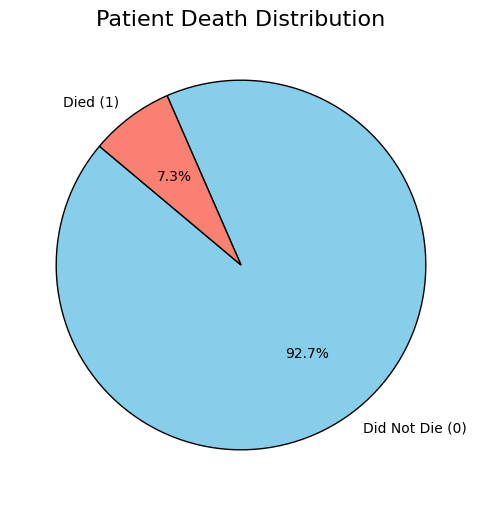

In [33]:
import matplotlib.pyplot as plt

# Count values
died_counts = df['DIED'].value_counts()
labels = ['Did Not Die (0)', 'Died (1)']
colors = ['skyblue', 'salmon']

# Plot
plt.figure(figsize=(6,6))
plt.pie(died_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Patient Death Distribution', fontsize=16)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_11656\1481034353.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unit_codes, y=unit_values, palette=colors)


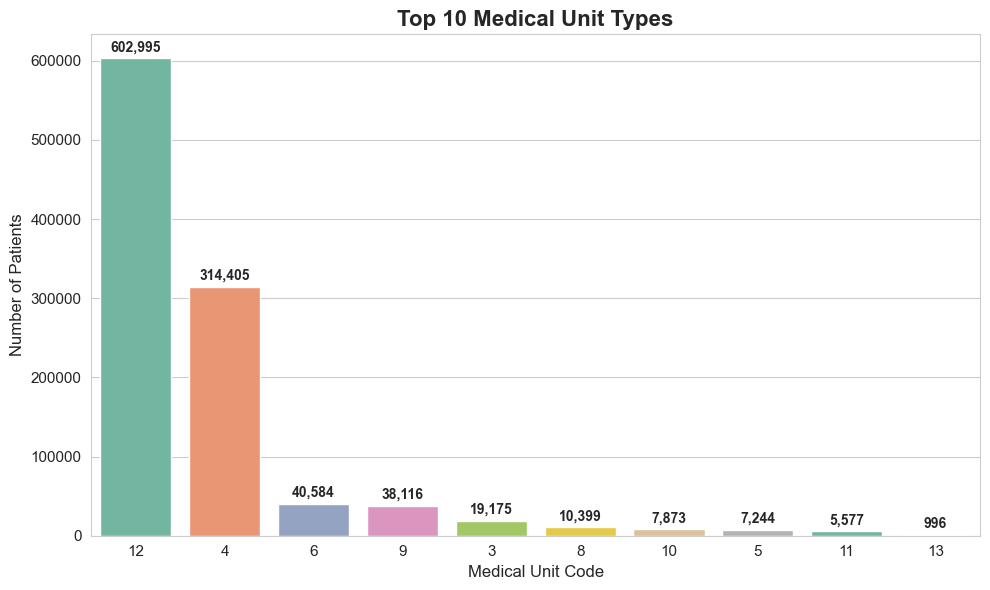

In [35]:
import seaborn as sns

# Prepare the data
unit_counts = df['MEDICAL_UNIT'].value_counts().head(10)
unit_codes = unit_counts.index.astype(str)
unit_values = unit_counts.values

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create the bar plot with a color palette
colors = sns.color_palette("Set2", len(unit_codes))  
sns.barplot(x=unit_codes, y=unit_values, palette=colors)

# Add labels on top of bars
for i, value in enumerate(unit_values):
    plt.text(i, value + 5000, f'{value:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Titles and labels
plt.title('Top 10 Medical Unit Types', fontsize=16, fontweight='bold')
plt.xlabel('Medical Unit Code', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)

# Add some styling
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_11656\2113142032.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PNEUMONIA_LABEL'] = df['PNEUMONIA'].map(pneumonia_mapping)
C:\Users\hp\AppData\Local\Temp\ipykernel_11656\2113142032.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pneumonia_counts.index, y=pneumonia_counts.values, palette=colors)


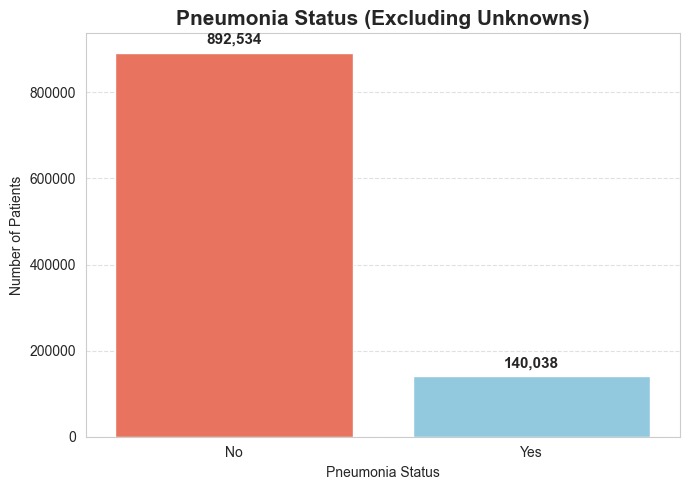

In [42]:
# Re-map (if needed)
pneumonia_mapping = {1: 'Yes', 2: 'No'}
df['PNEUMONIA_LABEL'] = df['PNEUMONIA'].map(pneumonia_mapping)

# Count values
pneumonia_counts = df['PNEUMONIA_LABEL'].value_counts()

# Plot
plt.figure(figsize=(7, 5))
colors = ['tomato', 'skyblue']
sns.barplot(x=pneumonia_counts.index, y=pneumonia_counts.values, palette=colors)

# Add labels
for i, count in enumerate(pneumonia_counts.values):
    plt.text(i, count + 20000, f'{count:,}', ha='center', fontsize=11, fontweight='bold')

# Titles and styling
plt.title('Pneumonia Status (Excluding Unknowns)', fontsize=15, fontweight='bold')
plt.ylabel('Number of Patients')
plt.xlabel('Pneumonia Status')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

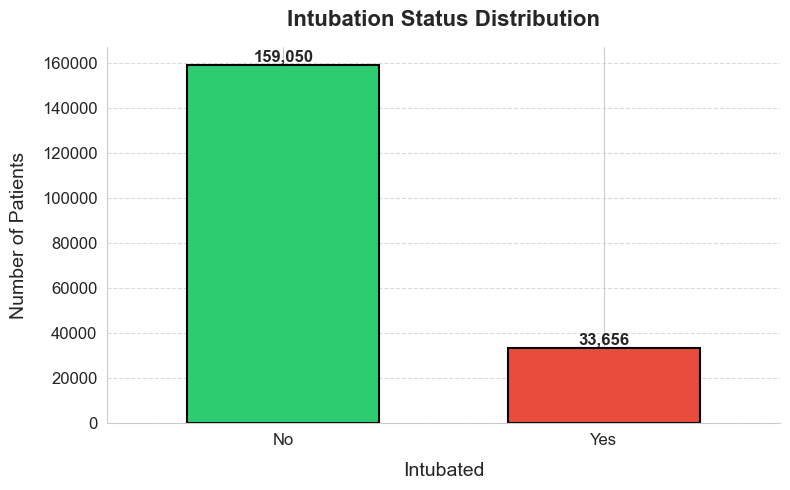

In [46]:
# Remove unknown/not recorded rows
df_clean = df[~df['INTUBED'].isin([97, 99])].copy()

# Map values for readability
intubed_map = {1: 'Yes', 2: 'No'}
df_clean['INTUBED_LABEL'] = df_clean['INTUBED'].map(intubed_map)

# Value counts for plotting
counts = df_clean['INTUBED_LABEL'].value_counts()

plt.figure(figsize=(8,5))

colors = ['#2ecc71', '#e74c3c']  # Green for 'No', Red for 'Yes'

# Plot bar chart with edge colors and slightly thicker bars
counts.plot(kind='bar', color=colors, edgecolor='black', linewidth=1.5, width=0.6)

# Title and labels with better font size and weight
plt.title('Intubation Status Distribution', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Intubated', fontsize=14, labelpad=10)
plt.ylabel('Number of Patients', fontsize=14, labelpad=10)

# X ticks with no rotation and bigger font size
plt.xticks(rotation=0, fontsize=12)

# Y ticks font size
plt.yticks(fontsize=12)

# Add grid lines on y-axis only, light gray and dashed
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines for cleaner look
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add value labels on top of bars
for i, v in enumerate(counts):
    ax.text(i, v + max(counts)*0.01, f"{v:,}", ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_11656\2992061749.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



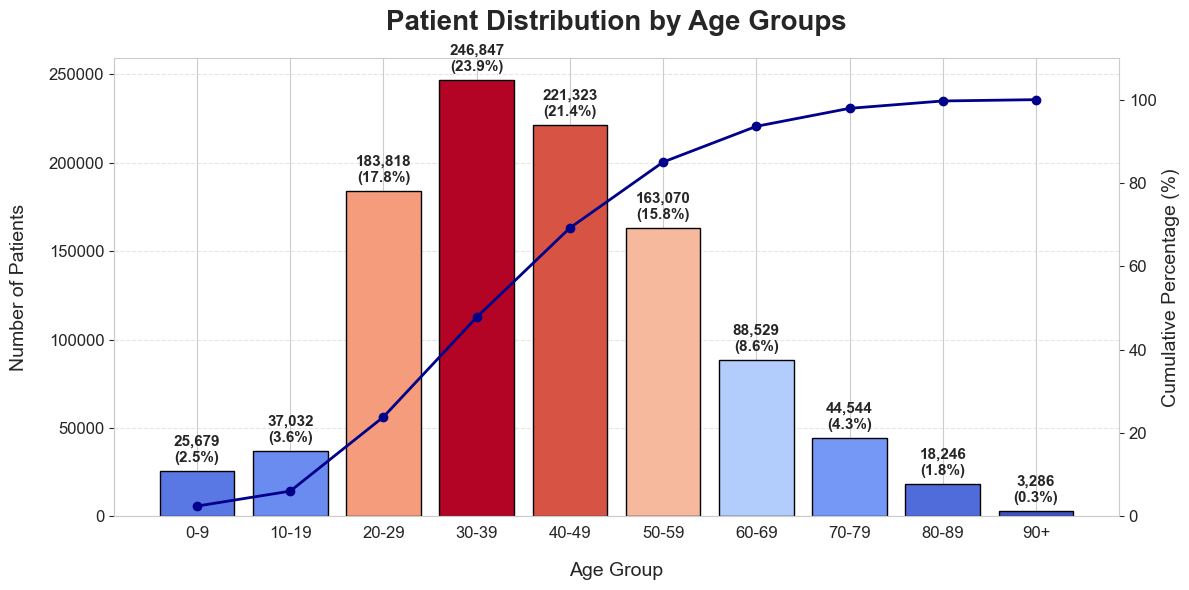

In [49]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']

# Bin the ages
df['AGE_BIN'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

# Count patients in each bin
age_bin_counts = df['AGE_BIN'].value_counts().sort_index()

# Calculate percentages
total_patients = age_bin_counts.sum()
age_bin_percent = age_bin_counts / total_patients * 100

plt.figure(figsize=(12,6))

bars = plt.bar(age_bin_counts.index, age_bin_counts.values, color=plt.cm.coolwarm(age_bin_percent / max(age_bin_percent)), edgecolor='black')

# Add value labels (count and percentage)
for i, (count, percent) in enumerate(zip(age_bin_counts.values, age_bin_percent.values)):
    plt.text(i, count + total_patients*0.005, f"{count:,}\n({percent:.1f}%)", ha='center', fontsize=11, fontweight='bold')

plt.title('Patient Distribution by Age Groups', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Age Group', fontsize=14, labelpad=15)
plt.ylabel('Number of Patients', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plot cumulative percentage line on secondary axis
cumulative_percent = age_bin_percent.cumsum()
ax2 = ax.twinx()
ax2.plot(age_bin_counts.index, cumulative_percent, color='darkblue', marker='o', linewidth=2)
ax2.set_ylabel('Cumulative Percentage (%)', fontsize=14)
ax2.set_ylim(0, 110)
ax2.grid(False)
ax2.tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

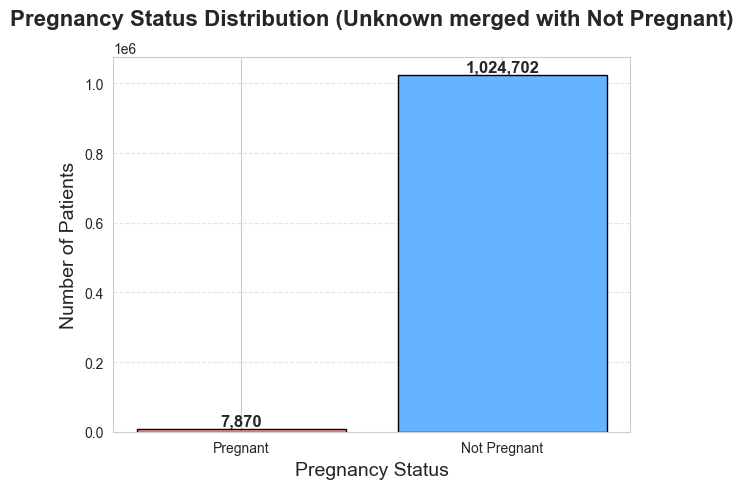

In [54]:
# Replace unknown codes first
df['PREGNANT'] = df['PREGNANT'].replace([97, 98], 2)

# Count values
pregnant_counts = df['PREGNANT'].value_counts().sort_index()

# Map codes to labels
labels = {1: 'Pregnant', 2: 'Not Pregnant'}
pregnant_counts.index = pregnant_counts.index.map(lambda x: labels.get(x, str(x)))

plt.figure(figsize=(6,5))
colors = ['#ff9999', '#66b3ff']  # Red and Blue

bars = plt.bar(pregnant_counts.index, pregnant_counts.values, color=colors, edgecolor='black', linewidth=1)

plt.title('Pregnancy Status Distribution (Unknown merged with Not Pregnant)', fontsize=16, fontweight='bold', pad=12)
plt.ylabel('Number of Patients', fontsize=14)
plt.xlabel('Pregnancy Status', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for i, count in enumerate(pregnant_counts.values):
    plt.text(i, count + max(pregnant_counts)*0.01, f"{count:,}", ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

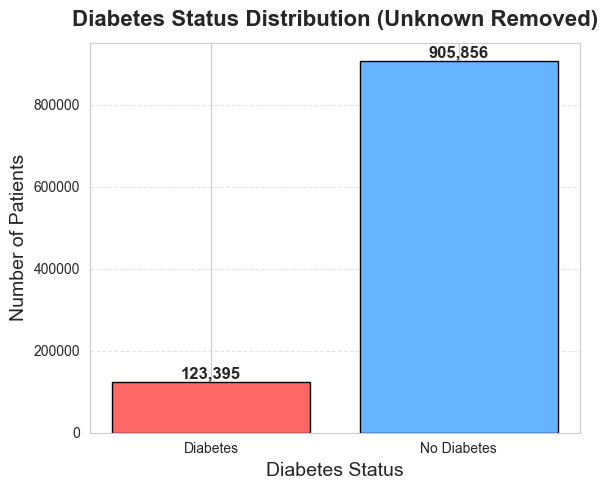

In [56]:
# Filter out unknown (98)
df_filtered = df[df['DIABETES'] != 98]

# Get counts sorted by index for clarity
diabetes_counts = df_filtered['DIABETES'].value_counts().sort_index()

# Map codes to labels
labels = {1: 'Diabetes', 2: 'No Diabetes'}
diabetes_counts.index = diabetes_counts.index.map(lambda x: labels.get(x, str(x)))

plt.figure(figsize=(6,5))
colors = ['#ff6666', '#66b3ff']  # Red and Blue

bars = plt.bar(diabetes_counts.index, diabetes_counts.values, color=colors, edgecolor='black', linewidth=1)

plt.title('Diabetes Status Distribution (Unknown Removed)', fontsize=16, fontweight='bold', pad=12)
plt.xlabel('Diabetes Status', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add count labels on top of bars
for i, count in enumerate(diabetes_counts.values):
    plt.text(i, count + max(diabetes_counts)*0.01, f"{count:,}", ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_11656\1139555174.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




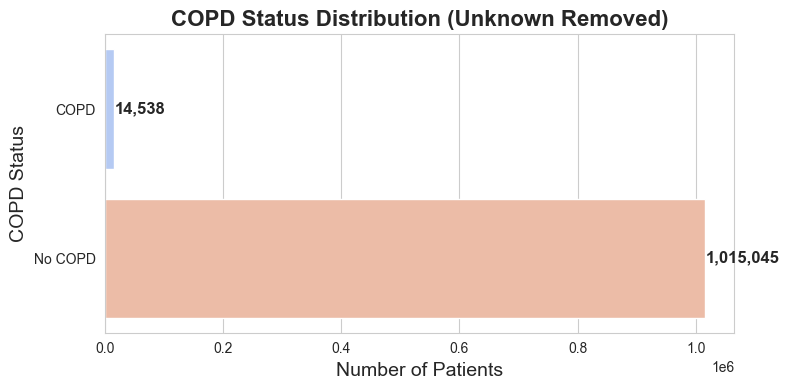

In [58]:
# Filter out unknown (98)
df_copd_filtered = df[df['COPD'] != 98]

# Get counts and map codes to labels
copd_counts = df_copd_filtered['COPD'].value_counts().sort_index()
labels = {1: 'COPD', 2: 'No COPD'}
copd_counts.index = copd_counts.index.map(lambda x: labels.get(x, str(x)))

# Convert to DataFrame for seaborn plotting
copd_df = copd_counts.reset_index()
copd_df.columns = ['COPD Status', 'Count']

plt.figure(figsize=(8,4))

# Horizontal barplot with seaborn
sns.barplot(x='Count', y='COPD Status', data=copd_df, palette='coolwarm')

plt.title('COPD Status Distribution (Unknown Removed)', fontsize=16, fontweight='bold')
plt.xlabel('Number of Patients', fontsize=14)
plt.ylabel('COPD Status', fontsize=14)

# Add count labels on the bars
for index, row in copd_df.iterrows():
    plt.text(row['Count'] + 2000, index, f"{row['Count']:,}", va='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

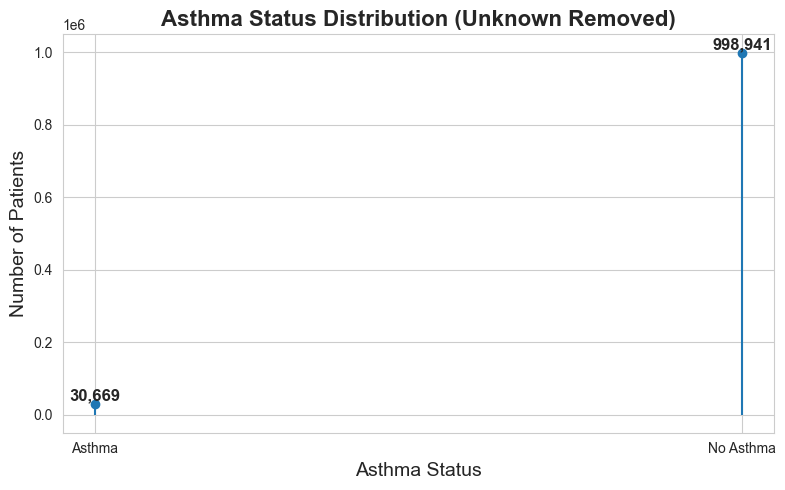

In [60]:
# Filter out unknowns (assuming 98 means unknown)
df_asthma_filtered = df[df['ASTHMA'] != 98]

# Count values and map codes to labels
asthma_counts = df_asthma_filtered['ASTHMA'].value_counts().sort_index()
labels = {1: 'Asthma', 2: 'No Asthma'}
asthma_counts.index = asthma_counts.index.map(lambda x: labels.get(x, str(x)))

# Prepare data
statuses = asthma_counts.index.tolist()
counts = asthma_counts.values

plt.figure(figsize=(8,5))

# Plot lollipop chart
plt.stem(statuses, counts, linefmt='-', markerfmt='o', basefmt=' ')

plt.title('Asthma Status Distribution (Unknown Removed)', fontsize=16, fontweight='bold')
plt.ylabel('Number of Patients', fontsize=14)
plt.xlabel('Asthma Status', fontsize=14)

# Add count labels
for i, count in enumerate(counts):
    plt.text(i, count + max(counts)*0.01, f"{count:,}", ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

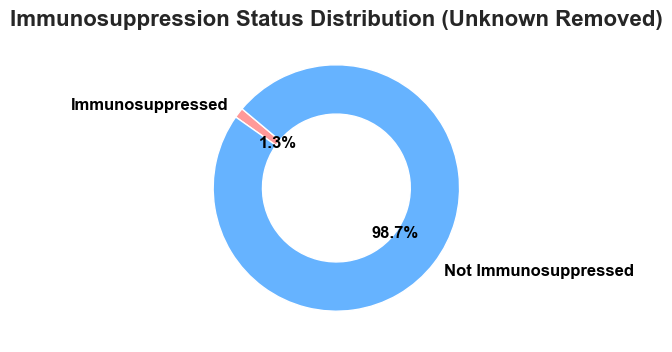

In [63]:
# Filter out unknowns
df_inmsupr_filtered = df[df['INMSUPR'] != 98]

# Get counts
inmsupr_counts = df_inmsupr_filtered['INMSUPR'].value_counts().sort_index()
labels = {1: 'Immunosuppressed', 2: 'Not Immunosuppressed'}
inmsupr_counts.index = inmsupr_counts.index.map(lambda x: labels.get(x, str(x)))

# Data for plotting
counts = inmsupr_counts.values
statuses = inmsupr_counts.index.tolist()

# Colors for segments
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(4,4))
wedges, texts, autotexts = plt.pie(
    counts, 
    labels=statuses,
    autopct='%1.1f%%', 
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w'),
    textprops=dict(color="black", fontsize=12, fontweight='bold')
)

plt.title('Immunosuppression Status Distribution (Unknown Removed)', fontsize=16, fontweight='bold')
plt.show()

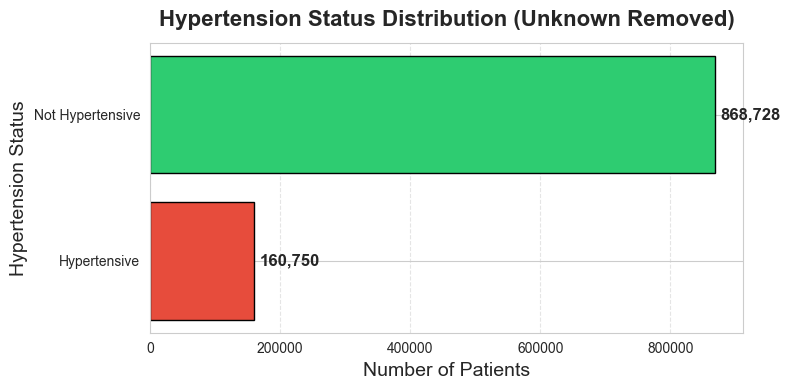

In [65]:
df_hyper_filtered = df[df['HIPERTENSION'] != 98]

# Get counts
hyper_counts = df_hyper_filtered['HIPERTENSION'].value_counts().sort_index()
labels = {1: 'Hypertensive', 2: 'Not Hypertensive'}
hyper_counts.index = hyper_counts.index.map(lambda x: labels.get(x, str(x)))

# Data
statuses = hyper_counts.index.tolist()
counts = hyper_counts.values

# Plot
plt.figure(figsize=(8,4))

bars = plt.barh(statuses, counts, color=['#e74c3c', '#2ecc71'], edgecolor='black')

# Add counts on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + max(counts)*0.01, bar.get_y() + bar.get_height()/2, f"{width:,}", va='center', fontsize=12, fontweight='bold')
plt.title('Hypertension Status Distribution (Unknown Removed)', fontsize=16, fontweight='bold', pad=12)
plt.xlabel('Number of Patients', fontsize=14)
plt.ylabel('Hypertension Status', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

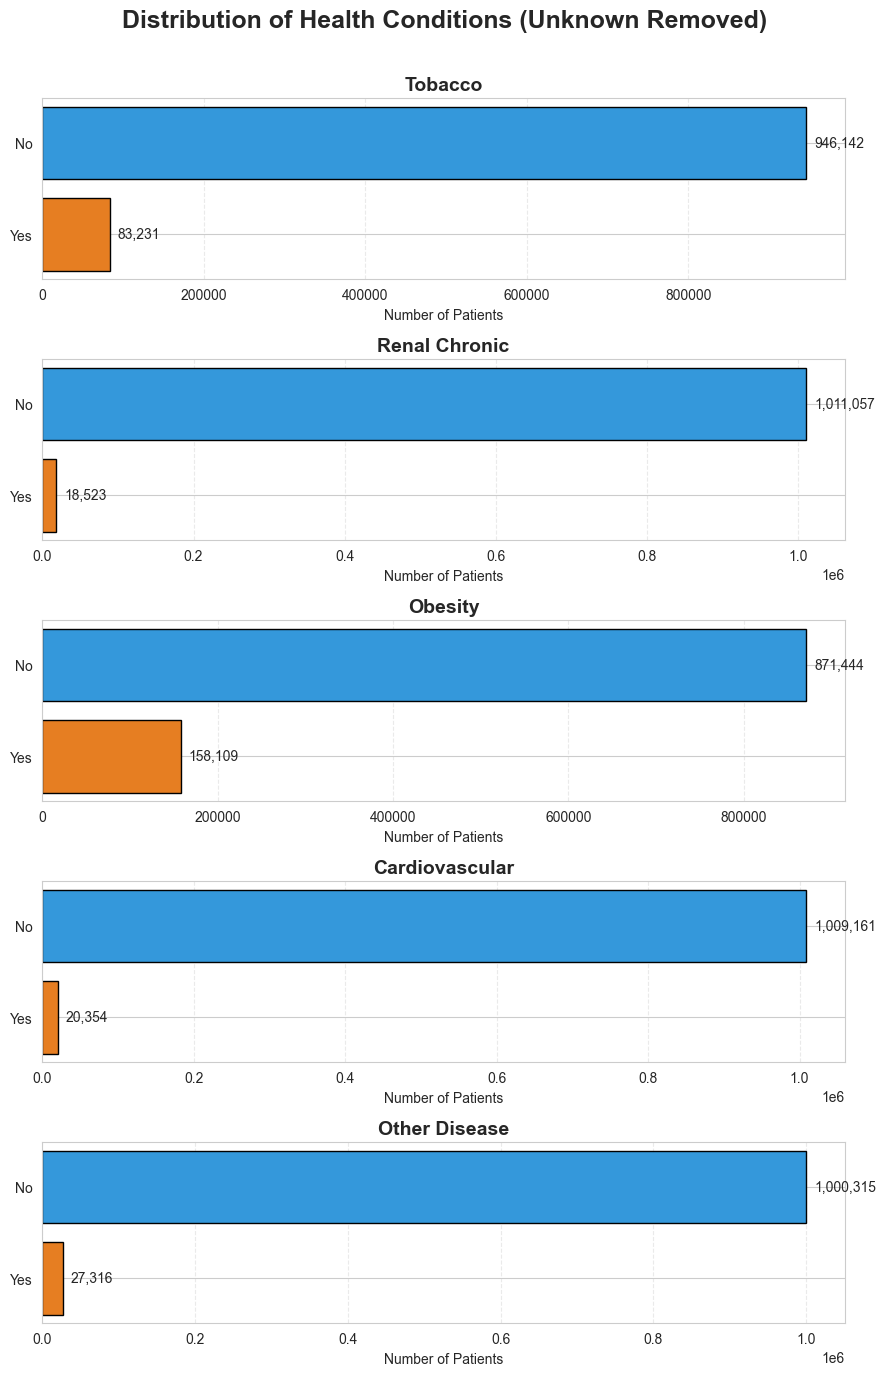

In [69]:
# List of conditions
conditions = ["TOBACCO", "RENAL_CHRONIC", "OBESITY", "CARDIOVASCULAR", "OTHER_DISEASE"]
labels_map = {1: "Yes", 2: "No"}

# Set up subplots
fig, axes = plt.subplots(nrows=len(conditions), figsize=(9, 14))
fig.suptitle('Distribution of Health Conditions (Unknown Removed)', fontsize=18, fontweight='bold')

colors = ['#e67e22', '#3498db']  # Orange for Yes, Blue for No

for i, condition in enumerate(conditions):
    # Remove unknowns
    filtered = df[df[condition] != 98]
    
    # Value counts
    counts = filtered[condition].value_counts().sort_index()
    counts.index = counts.index.map(lambda x: labels_map.get(x, str(x)))
    
    # Plot
    axes[i].barh(counts.index, counts.values, color=colors, edgecolor='black')
    axes[i].set_title(f"{condition.replace('_', ' ').title()}", fontsize=14, fontweight='bold')
    
    # Add values on bars
    for idx, val in enumerate(counts.values):
        axes[i].text(val + max(counts.values)*0.01, idx, f"{val:,}", va='center', fontsize=10)
    
    axes[i].set_xlabel("Number of Patients")
    axes[i].grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

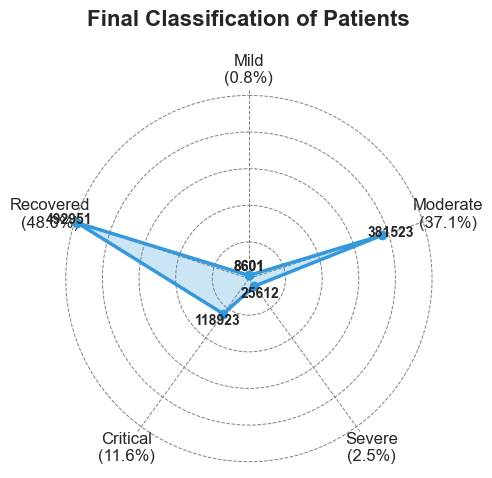

In [82]:
# Mapping class labels
class_labels = {
    1: "Mild",
    3: "Moderate",
    5: "Severe",
    6: "Critical",
    7: "Recovered"
}

# Prepare and normalize the data
classification_counts = df['CLASIFFICATION_FINAL'].value_counts().sort_index()
classification_counts = classification_counts[classification_counts.index.isin(class_labels.keys())]
total = classification_counts.sum()
labels = [class_labels[i] for i in classification_counts.index]
values = classification_counts.values
percentages = [v / total * 100 for v in values]

# Extend for radar shape
values = list(values) + [values[0]]
percentages = list(percentages) + [percentages[0]]
labels_with_percent = [f"{label}\n({p:.1f}%)" for label, p in zip(labels, percentages[:-1])]

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

# Plotting
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))
ax.plot(angles, values, color='#3498db', linewidth=2.5, marker='o')
ax.fill(angles, values, color='#3498db', alpha=0.25)

# Customize grid and axes
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels_with_percent, fontsize=12)

# Add radial labels (values)
for angle, value, percent in zip(angles, values, percentages):
    ax.text(angle, value + max(values) * 0.05, f"{int(value)}", ha='center', va='center', fontsize=10, fontweight='bold')

# Title
ax.set_title('Final Classification of Patients', size=16, fontweight='bold', pad=20)
ax.grid(color='gray', linestyle='--', linewidth=0.7)
ax.spines['polar'].set_visible(False)
ax.set_yticklabels([])  # Hide circular ticks

plt.tight_layout()
plt.show()

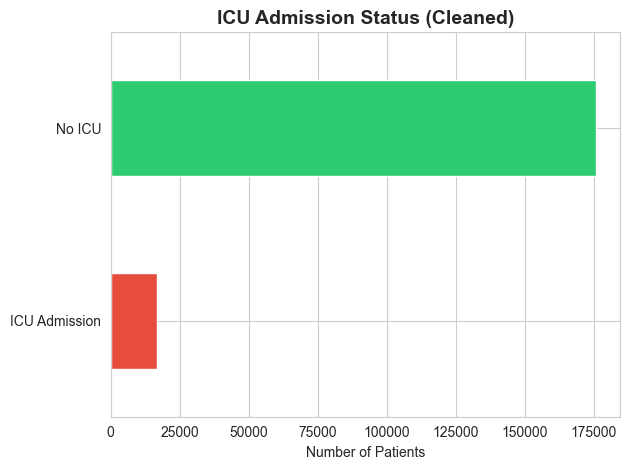

In [77]:
# Cleaned ICU data
icu_clean = df[df['ICU'].isin([1, 2])]['ICU'].value_counts().sort_index()
icu_clean.index = ['ICU Admission', 'No ICU']
icu_clean.plot(kind='barh', color=['#e74c3c', '#2ecc71'])

plt.title('ICU Admission Status (Cleaned)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Patients')
plt.tight_layout()
plt.show()

In [83]:
# Make a copy to avoid modifying the original DataFrame
df_encoded = df.copy()

# Convert all object or category columns to numeric codes
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object' or str(df_encoded[col].dtype).startswith('category'):
        df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Now compute the correlation matrix
corr_matrix = df_encoded.corr(method='pearson')

In [84]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['DATE_DIED', 'PNEUMONIA_LABEL', 'AGE_BIN'], dtype='object')


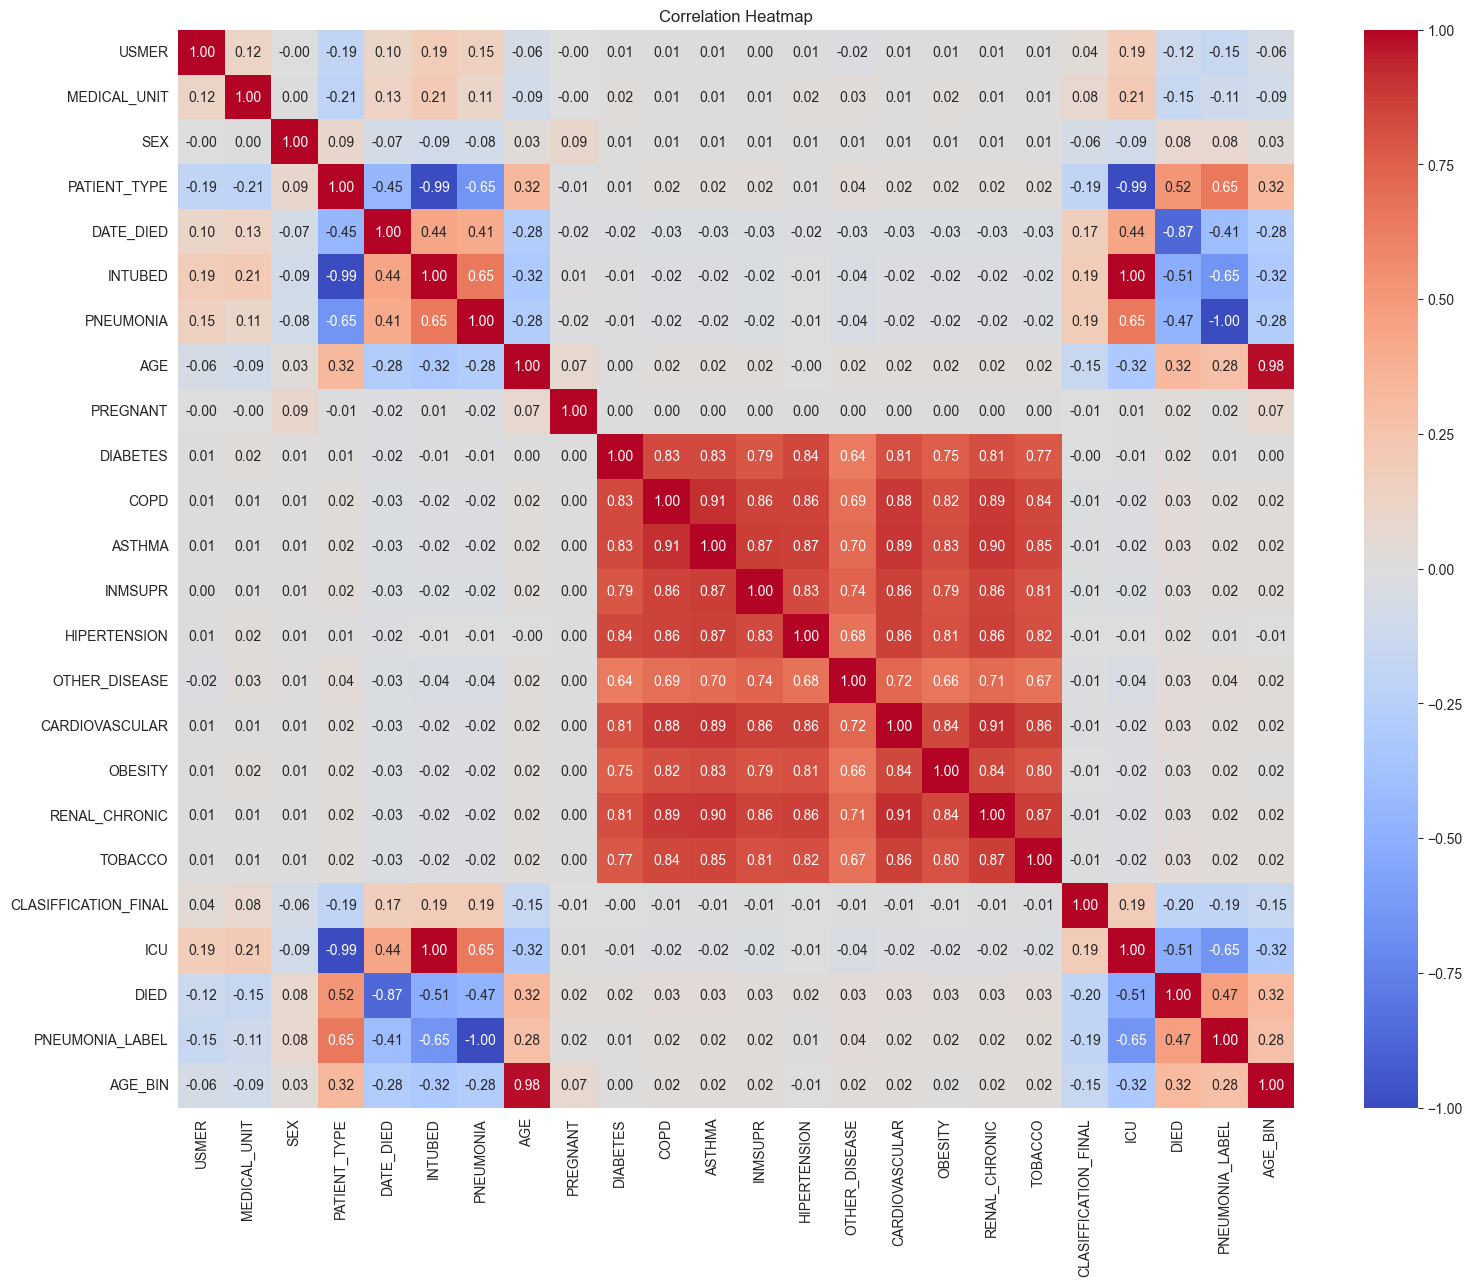

In [85]:
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [93]:
# Define clean feature list (EXCLUDE DATE_DIED and ICU)
feature_columns = [
    'USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE',
    'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
    'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO',
    'CLASIFFICATION_FINAL'
]

# Create model DataFrame
df = df[feature_columns + ["RISK_GROUP"]].copy()

# Train-test split
from sklearn.model_selection import train_test_split

X = df.drop("RISK_GROUP", axis=1)
y = df["RISK_GROUP"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

weighted_tree = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced')
weighted_tree.fit(X_train, y_train)

# Predict and Evaluate
y_pred_weighted = weighted_tree.predict(X_test)

print(" Accuracy:", accuracy_score(y_test, y_pred_weighted))
print("\n Classification Report:\n", classification_report(y_test, y_pred_weighted))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred_weighted))

✅ Accuracy: 0.8536764883906738

📄 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93    188711
           1       0.05      0.92      0.09      1107
           2       0.53      0.71      0.61     16697

    accuracy                           0.85    206515
   macro avg       0.53      0.83      0.54    206515
weighted avg       0.95      0.85      0.90    206515

🔁 Confusion Matrix:
 [[163484  15051  10176]
 [     0   1017     90]
 [   630   4271  11796]]


In [94]:
def predict_risk_group(model, input_data, feature_columns):
    """
    Predicts the RISK_GROUP of a new patient using the trained decision tree model.

    Parameters:
    - model: trained decision tree classifier
    - input_data: dictionary of patient features (must match training features)
    - feature_columns: list of features used to train the model

    Returns:
    - Predicted RISK_GROUP class
    """
    # Convert dictionary to DataFrame
    input_df = pd.DataFrame([input_data], columns=feature_columns)
    
    # Ensure all required columns are present
    missing = set(feature_columns) - set(input_df.columns)
    if missing:
        raise ValueError(f"Missing features: {missing}")
    
    # Predict
    prediction = model.predict(input_df)[0]
    return prediction

In [102]:
new_patient = {
    'USMER': 1,
    'MEDICAL_UNIT': 9,
    'SEX': 1,
    'PATIENT_TYPE': 1,
    'INTUBED': 2,
    'PNEUMONIA': 1,
    'AGE': 65,
    'PREGNANT': 2,
    'DIABETES': 1,
    'COPD': 2,
    'ASTHMA': 2,
    'INMSUPR': 2,
    'HIPERTENSION': 1,
    'OTHER_DISEASE': 2,
    'CARDIOVASCULAR': 2,
    'OBESITY': 1,
    'RENAL_CHRONIC': 2,
    'TOBACCO': 1,
    'CLASIFFICATION_FINAL': 2
}

predicted_group = predict_risk_group(weighted_tree, new_patient, feature_columns)
print("Predicted Risk Group:", predicted_group)

Predicted Risk Group: 2
